# Kaggle Titanic : Machine Learning from Disaster
### Order of Work
- Understand the data
- asdf

In [765]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [973]:
# load train & test data
train = pd.read_csv("train.csv")
test = pd.read_csv('test.csv')

### Data Description
- <b>survival</b> : survive = 1 / dead = 0 <br>
- <b>pclass</b> : ticket class : 1st = 1 / 2nd = 2 / 3rd = 3<br>
- <b>sex</b><br>
- <b>age</b> x.5 if estimated<br>
- <b>sibsp</b> # of siblings / spouses aboard<br>
- <b>parch</b> : # of parents / children aboard<br>
- <b>ticket</b> : ticket number<br>
- <b>fare</b> : passenger fare<br>
- <b>cabin</b> : cabin number<br>
- <b>embarked</b>

In [974]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [975]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [976]:
#Drop passenger id, ticket : considered unnecessary
train = train.drop(['PassengerId'], axis = 1)
train = train.drop(['Ticket'], axis = 1)

test = test.drop(['Ticket'], axis = 1)

In [977]:
train.shape, test.shape
#train : 891 sets of data & 12 features
#test :  418 sets of data & 11 features (X survived)

((891, 10), (418, 10))

In [978]:
# find missing values
train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [979]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [980]:
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

### Fiiling in 'Age' missing value

In [981]:
# Extraction of 'title' information from train['Name']
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
train = train.drop(['Name'], axis = 1)

test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
test = test.drop(['Name'], axis = 1)

In [982]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dona        1
Ms          1
Dr          1
Name: Title, dtype: int64

In [983]:
titleMap = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

train['Title'] = train['Title'].map(titleMap)
test['Title'] = test['Title'].map(titleMap)

In [984]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("mean"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("mean"), inplace=True)

In [985]:
train['Age'].isnull().sum(), test['Age'].isnull().sum() #ALL Filled

(0, 0)

##### Deciding the gap between ages

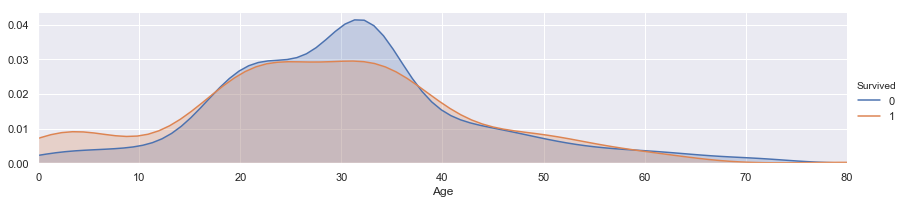

In [986]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show() 

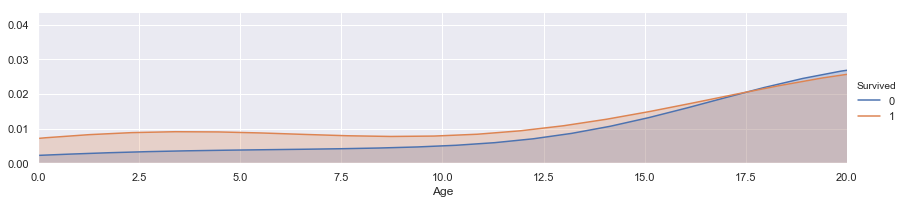

In [987]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, 20))
facet.add_legend()
 
plt.show() # 0 ~ 15

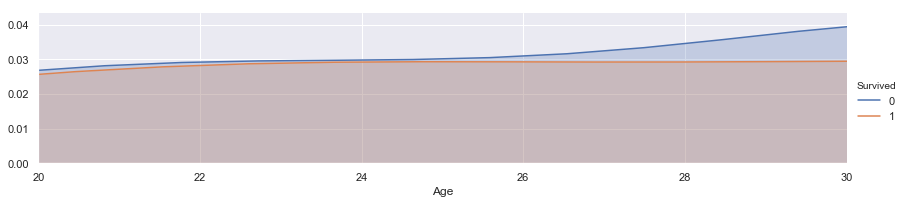

In [988]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(20, 30))
facet.add_legend()
 
plt.show() # ~ 24

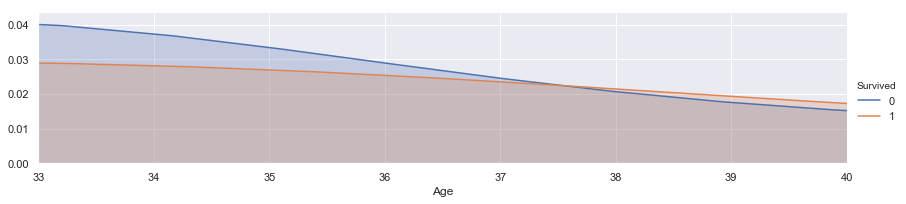

In [989]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(33, 40))
facet.add_legend()
 
plt.show() # ~ 37

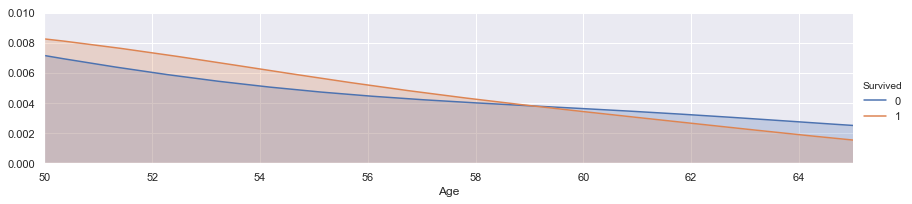

In [990]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(50, 65))
facet.set(ylim = (0, 0.01))
facet.add_legend()
 
plt.show() # ~ 59

In [991]:
#same interval(almost)
train.loc[train['Age'] <= 15 , 'Age'] = 0
train.loc[(15 < train['Age']) & (train['Age'] <= 24) , 'Age'] = 1
train.loc[(24 < train['Age']) & (train['Age'] <= 37) , 'Age'] = 2
train.loc[(37 <= train['Age']) & (train['Age'] <= 59) , 'Age'] = 3
train.loc[59 < train['Age'] , 'Age'] = 4

test.loc[test['Age'] <= 15 , 'Age'] = 0
test.loc[(15 < test['Age']) & (test['Age'] <= 24) , 'Age'] = 1
test.loc[(24 < test['Age']) & (test['Age'] <= 37) , 'Age'] = 2
test.loc[(37 <= test['Age']) & (test['Age'] <= 59) , 'Age'] = 3
test.loc[59 < test['Age'] , 'Age'] = 4

### Filling in 'Cabin' missing values

In [992]:
#Picking out the first letter of the cabin
train['Cabin'] = train['Cabin'].str[:1]
test['Cabin'] = test['Cabin'].str[:1]

In [993]:
train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [994]:
cabinMap = {"C" : 0, "B" : 1, "D" : 2, "E" : 3, "A" : 4, "F" : 4, "G" : 4, "T" : 4}
train['Cabin'] = train['Cabin'].map(cabinMap)
test['Cabin'] = test['Cabin'].map(cabinMap)

In [995]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [996]:
train['Cabin'].value_counts(), test['Cabin'].value_counts()

(4.0    512
 3.5    168
 1.0     87
 0.0     59
 2.0     33
 3.0     32
 Name: Cabin, dtype: int64, 4.0    316
 1.0     45
 0.0     35
 2.0     13
 3.0      9
 Name: Cabin, dtype: int64)

In [997]:
train.groupby("Survived")["Cabin"].value_counts()

Survived  Cabin
0         4.0      382
          3.5       94
          1.0       33
          0.0       24
          2.0        8
          3.0        8
1         4.0      130
          3.5       74
          1.0       54
          0.0       35
          2.0       25
          3.0       24
Name: Cabin, dtype: int64

##### Filling 'Embarked' missing value

In [998]:
train['Embarked'].value_counts() #'S' is most common

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [999]:
train['Embarked'] = train['Embarked'].fillna('S')
test['Embarked'] = test['Embarked'].fillna('S')

In [1000]:
embarkedMap = {"S" : 0, "C" : 1, "Q" : 2}
train['Embarked'] = train['Embarked'].map(embarkedMap)
test['Embarked'] = test['Embarked'].map(embarkedMap)

### +

In [1001]:
#Mapping
sexMap = {"male" : 0, "female" : 1}
train['Sex'] = train['Sex'].map(sexMap)
test['Sex'] = test['Sex'].map(sexMap)

In [1002]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1

In [1003]:
train['Family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64

In [1004]:
train[train['Survived'] == 1]['Family'].value_counts()

1    163
2     89
3     59
4     21
7      4
6      3
5      3
Name: Family, dtype: int64

In [1005]:
train[train['Survived'] == 0]['Family'].value_counts()

1     374
2      72
3      43
6      19
5      12
7       8
4       8
11      7
8       6
Name: Family, dtype: int64

In [1006]:
familyMap = {0: 0, 1: 1, 2: 2, 5: 3, 4: 3, 6: 3, 3: 3, 10: 3, 7: 3}
train['Family'] = train['Family'].map(familyMap)
test['Family'] = test['Family'].map(familyMap)

In [1007]:
train.groupby("Survived")["Family"].value_counts()

Survived  Family
0         1.0       374
          3.0        90
          2.0        72
1         1.0       163
          3.0        90
          2.0        89
Name: Family, dtype: int64

In [1008]:
train = train.drop(['SibSp'], axis = 1)
test = test.drop(['SibSp'], axis = 1)

train = train.drop(['Parch'], axis = 1)
test = test.drop(['Parch'], axis = 1)

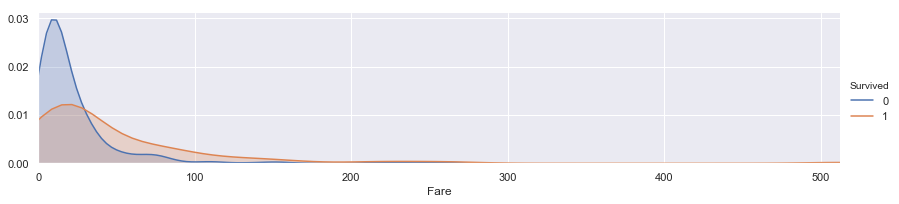

In [1009]:
# Fare
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
 
plt.show()  

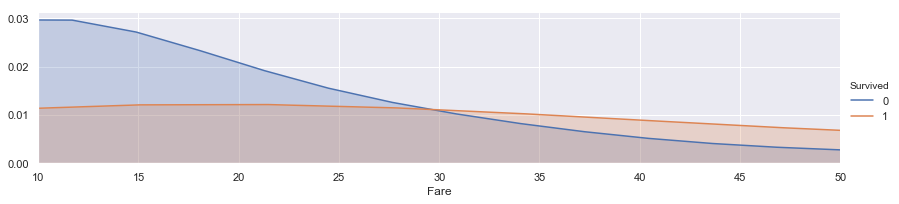

In [1010]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(10, 50))
facet.add_legend()
 
plt.show()  # ~15 ~30

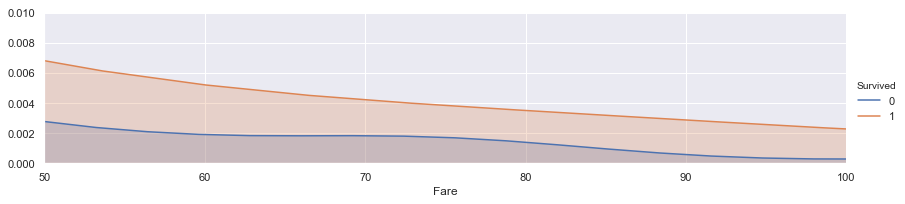

In [1011]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(50, 100))
facet.set(ylim = (0, 0.01))
facet.add_legend()
 
plt.show()  # 100

In [1012]:
train.loc[train['Fare'] <= 15 , 'Fare'] = 0
train.loc[(15 < train['Fare']) & (train['Fare'] <= 30) , 'Fare'] = 1
train.loc[(30 < train['Fare']) & (train['Fare'] <= 100) , 'Fare'] = 2
train.loc[100 < train['Fare'] , 'Fare'] = 3

test.loc[test['Fare'] <= 15 , 'Fare'] = 0
test.loc[(15 < test['Fare']) & (test['Fare'] <= 30) , 'Fare'] = 1
test.loc[(30 < test['Fare']) & (test['Fare'] <= 100) , 'Fare'] = 2
test.loc[100 < test['Fare'] , 'Fare'] = 3

In [1013]:
train.head(15)

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,Family
0,0,3,0,1.0,0.0,4.0,0,0,2.0
1,1,1,1,3.0,2.0,0.0,1,2,2.0
2,1,3,1,2.0,0.0,4.0,0,1,1.0
3,1,1,1,2.0,2.0,0.0,0,2,2.0
4,0,3,0,2.0,0.0,4.0,0,0,1.0
5,0,3,0,2.0,0.0,4.0,2,0,1.0
6,0,1,0,3.0,2.0,3.0,0,0,1.0
7,0,3,0,0.0,1.0,4.0,0,3,3.0
8,1,3,1,2.0,0.0,4.0,0,2,3.0
9,1,2,1,0.0,2.0,3.5,1,2,2.0


### Logistic Regression

##### A simpler version of Logistic Regression using 'Pclass' & 'Sex'

In [1051]:
#Parameters needed : w0, w1, w2... : w_list = []

#Set w0, w1, w2... w7 randomly
import random
w_list = []
for i in range(0, 8) :
    w_list.append(random.random() * 2 - 1)

#check randomly generated nums
for i in range(0, 8) :
    print(w_list[i])

# set learning rate alpha : a
a = 0.001

0.08664854860155158
0.2869864230462158
0.6017627397264806
-0.0067189344475286905
-0.40348239134250274
-0.02897448753200238
-0.4243969600276589
-0.040463347916782855


In [1052]:
train_df = pd.DataFrame(train, columns= ['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin', 'Title', 'Family'])
test_df = pd.DataFrame(test, columns= ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Cabin', 'Title', 'Family'])

train_list = []
test_list = []

#train_list : [Survived, Pclass, Sex, ...]
train_list = train_df.values.tolist()

#test_list = [Pclass, Sex]
test_list = test_df.values.tolist()

print(train_list[0])
print(test_list[0])

[0.0, 3.0, 0.0, 1.0, 0.0, 0.0, 4.0, 0.0, 2.0]
[3.0, 0.0, 2.0, 0.0, 2.0, 4.0, 0.0, 1.0]


In [1053]:
len(train_list), len(test_list)

(891, 418)

In [1054]:
import math
cnt = 0
while(cnt < 50000) :
    sum = 0 # Σ i : 1 to m(= 891)
    for i in range(0, 891) :
        # Zi = w0 + w1 * x1 + w2 * x2 + ... + wn * xn
        Zi = w_list[0]
        for j in range (1, 8) :
            Zi = Zi + train_list[i][j] * w_list[j]
            
        Hi = 1 / (1 + math.exp(-Zi)) # Hi = 1 / (1 + e^(-Zi))
        Hi_y = Hi - train_list[i][0] # H(xi) - yi
        if cnt % 8 == 0 : # if w0
            sum = sum + Hi_y # Σ(Hi - y)
        else : # if Wn
            Hi_y_x = Hi_y * train_list[i][cnt % 8] # Σ(Hi - y) * Xi
            sum = sum + Hi_y_x
    # X = a * 1/m * Σ(...)
    X = a * sum / 891
    w_list[cnt % 8] = w_list[cnt % 8] - X
    cnt = cnt + 1

In [1055]:
answer_list = []
for i in range (0, 418) :
    Zx = w_list[0]
    for j in range (1, 8) :
        Zx = Zx + test_list[i][j-1] * w_list[j]
    print(Zx)
    if(Zx >= 0) :
        answer_list.append(1)
    else :
        answer_list.append(0)

test.loc[:, 'Survived'] = answer_list

-1.5287049804036363
0.2515686087068403
-1.7424711170971403
-1.7367497286107878
0.4458233253915307
-1.5424950119260974
0.015239283056749153
-1.715462021109303
0.5498456994951064
-1.5988232427581441
-1.7367497286107878
-0.515341233718345
1.8051583061366172
-1.9097167377939934
0.7330638789571823
0.5711334069965912
-1.54821640041245
-1.5355999961648668
-0.1928054651504023
0.355590982810416
-0.37051973210447076
0.08200928467266633
1.6109035894519268
-0.1762650154197803
1.7557250910658009
-1.833877086953133
1.367679248040605
-1.5355999961648668
-1.7913016719501633
-1.5919282269969135
-1.812589379451648
-1.5775355352566593
0.38949509455948395
0.29236773621713874
0.16552748148524676
-1.5355999961648668
-0.09567810680805722
-0.09567810680805722
-1.7367497286107878
-1.6551514735901909
-1.7298547128495572
-0.857133730623372
-1.833877086953133
0.32918454704037203
1.1719837342045545
-1.7367497286107878
-1.728078425356886
-1.5287049804036363
1.1788787499657851
0.38949509455948395
0.1586324657240162


In [1056]:
cnt = 0
for answer in answer_list :
    if answer == 1 :
        cnt = cnt + 1
print(cnt)

155


In [1057]:
submission_df = pd.DataFrame({
    "PassengerId" : test["PassengerId"],
    "Survived" : answer_list
})

In [1058]:
submission_df.to_csv('submission19.csv', index = False)

In [1059]:
submission_df.shape

(418, 2)